# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Dariush Ghaemi
2.   Student Number: 98109678


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
X=dataset['X']
Y=dataset['Y']
t_percent=0.8
n=len(X)
n_s=int(t_percent*n)

x_train = X[:n_s]
y_train = Y[:n_s]

x_test = X[n_s:]
y_test = Y[n_s:]

print(x_train.shape)
print(x_test.shape)

Drive already mounted at /media/gdrive; to attempt to forcibly remount, call drive.mount("/media/gdrive", force_remount=True).
(400,)
(100,)


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [ ]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
x_trainp=np.zeros((len(x_train), 2))
x_trainp[:, 0]=x_train.copy()
m = np.matmul(np.matmul(np.linalg.pinv(np.matmul(x_trainp, x_trainp.T)), x_trainp).T, y_train)
print(m)

[-0.41544332  0.        ]


In [ ]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y, y_train)
test_error = mean_squared_error(predicted_test_y, y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.49399991051222386
MSE test error: 0.5187262351385592


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

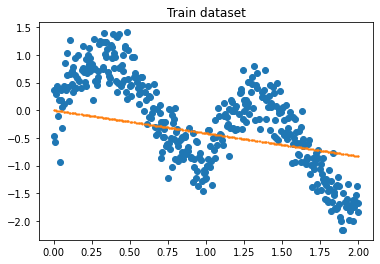

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

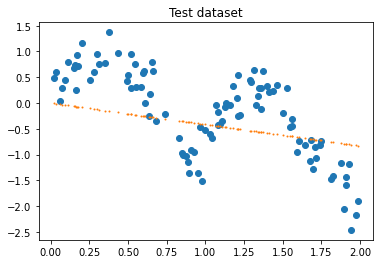

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

-write here-
<div dir=rtl>
دقت ها با توجه به نمودار داده ها کمی غیر قابل قبول است

بهترین خط به خوبی روند کلی داده ها را نمایش داده
و در هر دو نمودار، مشابه عمل کرده است.


اما برای تحلیل های مناسب تر با توجه به داده های تست میتوان حدس زد که رابطه ی X و Y از نوع چند جمله ایست و بهتر است با عبارات پیچیده تر بیان شود

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

-write here-

<div dir=rtl>

همانطور که اشاره شد، برای داشتن نتایج بهتر نیز است روابط را به صورت غیرخطی بیان کنیم

پس روش بالا نیز اثر کمی در کاهش خطا خواهد داشت.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [ ]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.sum((xi - the_query_point).T*(xi - the_query_point)) / (-2 * (hyperparameter **2) ))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [ ]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X=np.ones((l, 2))
    X[:, 0] = train_X
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.pinv(X.T*W @ X) @ X.T*W @ train_Y
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [ ]:
predicted_test = [predict(x_train, y_train, query, hyperparameter=1) for query in x_test]
predicted_test=np.array(predicted_test)
predicted_test= predicted_test.reshape(len(x_test))
error = mean_squared_error(predicted_test, y_test)

print(f"MSE test error: {error}")

MSE test error: 0.34911555666279787


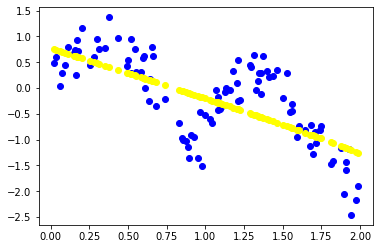

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

-write here-
<div dir=rtl>

نسبت به حالت قبلی بهتر عمل کرده است به دلیل آنکه، به هر بعد وزن مربوط به خودش را داده و طوری تنظیم کرده تا بهتر بتواند خطا را کم کند.
 

 در نتیجه خط کمی بالا تر و کج تر قرار گرفته تا خطای مورد نظر مینیمم شود.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

-write here-

<div dir=rtl>

چون داده های تست و ترین بسیار مشابه اند، اگر داده های زیادی را به عنوان همسایه در نظر بگیریم پاسخ خوبی دریافت خواهیم کرد.
چون knn میتواند پاسخ های غیر خطی نیز به ما بدهد

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance =(x1-x2)*(x1-x2)# implement the distance function
        return distance

    def return_nn_ids(self, x):
        dx=self.distance(self.X, x)
        indices = np.argsort(dx)[::-1][self.k:] # find indices of k nearest neighbours to x  dx.argsort()[:self.k][::-1]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(predicted_y, y_test)
    return error, predicted_y

In [ ]:
E=1
for k in range(320, 400):
  error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
  if(error_knn<E):
    E=error_knn
    k_o=k
  print(f"MSE error of KNN (k=", k, ") for test dataset: ", {error_knn})

MSE error of KNN (k= 320 ) for test dataset:  {0.13469795967634346}
MSE error of KNN (k= 321 ) for test dataset:  {0.1334241707260545}
MSE error of KNN (k= 322 ) for test dataset:  {0.13186560630588273}
MSE error of KNN (k= 323 ) for test dataset:  {0.13105450455183976}
MSE error of KNN (k= 324 ) for test dataset:  {0.1289395212571169}
MSE error of KNN (k= 325 ) for test dataset:  {0.12891186492016}
MSE error of KNN (k= 326 ) for test dataset:  {0.12692850153773563}
MSE error of KNN (k= 327 ) for test dataset:  {0.12511791632500086}
MSE error of KNN (k= 328 ) for test dataset:  {0.1237980153718218}
MSE error of KNN (k= 329 ) for test dataset:  {0.12298954981534212}
MSE error of KNN (k= 330 ) for test dataset:  {0.12134349563833409}
MSE error of KNN (k= 331 ) for test dataset:  {0.12034087332741582}
MSE error of KNN (k= 332 ) for test dataset:  {0.1202585513824992}
MSE error of KNN (k= 333 ) for test dataset:  {0.11778691159809394}
MSE error of KNN (k= 334 ) for test dataset:  {0.117068

In [ ]:
k=k_o
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN (k=", k, ") for test dataset:", {error_knn})

MSE error of KNN (k= 381 ) for test dataset: {0.09687363389746836}


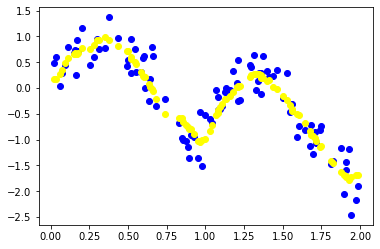

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

-write here-
<div dir=rtl>



برای k های خیلی بزرگ به دلیل آنکه داده های تست و ترین بسیار شباهت دارند، پاسخ غیر خطی بسیار خوبی دریافت میکنیم